# 4. pythonによる数値計算

## 4.01 数値計算の基本

### 浮動小数点数の演算

In [39]:
# 誤差を生む演算の例
s=0
for i in range(1000):
    s+=0.001

s

1.0000000000000007

* 数値の内部表現が原因で、誤差が生じる
* 計算機内では数値は２進数に変換され記憶され、0.001という数は完全に正確に記憶されているわけではなく、途中で丸められている
* python内部の浮動小数点数はおよそ17桁程度の精度がある

In [40]:
# 誤差により無限ループとなる例
s=0
while s!=1.:    # 0.1を10回足しても内部表現の誤差により1にはならない
    print(s)
    s+=0.1

844
1111.8000000000843
1111.9000000000842
1112.0000000000841
1112.100000000084
1112.200000000084
1112.3000000000839
1112.4000000000838
1112.5000000000837
1112.6000000000836
1112.7000000000835
1112.8000000000834
1112.9000000000833
1113.0000000000832
1113.1000000000831
1113.200000000083
1113.300000000083
1113.4000000000829
1113.5000000000828
1113.6000000000827
1113.7000000000826
1113.8000000000825
1113.9000000000824
1114.0000000000823
1114.1000000000822
1114.2000000000821
1114.300000000082
1114.400000000082
1114.5000000000819
1114.6000000000818
1114.7000000000817
1114.8000000000816
1114.9000000000815
1115.0000000000814
1115.1000000000813
1115.2000000000812
1115.3000000000811
1115.400000000081
1115.500000000081
1115.6000000000809
1115.7000000000808
1115.8000000000807
1115.9000000000806
1116.0000000000805
1116.1000000000804
1116.2000000000803
1116.3000000000802
1116.4000000000801
1116.50000000008
1116.60000000008
1116.7000000000799
1116.8000000000798
1116.9000000000797
1117.0000000000796
1

KeyboardInterrupt: 

In [1]:
# 誤差を産まない演算方法
eps=1e-10   # 十分に小さい正の値
s=0
while abs(s-1.)>eps:
    print(s)
    s+=0.1

0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999


### 演算による桁落ち

In [58]:
import numpy as np

def qeq(a,b,c):
    d=np.sqrt(b**2-4*a*c)
    return ((-b+d)/(2*a),(-b-d)/(2*a))

In [7]:
# 答えが正しい場合
qeq(1,5,6)

(-2.0, -3.0)

In [4]:
# 答えが間違っている場合
qeq(1,1.0000000001,0.0000000001)

(-1.000000082740371e-10, -1.0)

In [6]:
# np.sqrt(b**2-4*a*c)の計算
np.sqrt(1.0000000001**2-4*1*0.0000000001)

0.9999999999

* 絶対値の近い数字同士の引き算は有効桁数を大きく失う可能性があるので注意
* 絶対値の近い数字同士の引き算が発生しそうな計算を回避するためには、数式を同値な式で置き換えれば良い
* 符号関数（シグナム関数） sign(x)  
$$
{\rm sign}(x)=\left\{
    \begin{array}{l}
-1  (x<0)\\
0   (x=0)\\
1    (x>0)
\end{array}
\right.
$$  

In [19]:
def qeq2(a,b,c):
    alpha=(-b-np.sign(b)*np.sqrt(b**2-4*a*c))/(2*a)
    beta=c/(a*alpha)
    return (alpha,beta)

In [20]:
qeq2(1,5,6)

(-3.0, -2.0)

In [21]:
qeq2(1,1.0000000001,0.0000000001)

(-1.0, -1e-10)

* 誤差が比較的小さく抑えられる解法を数値的に安定な解法という

### 数値範囲の考慮

In [22]:
def softplus(x):
    return np.log(1+np.exp(x))

In [26]:
softplus(-1)

0.31326168751822286

In [25]:
softplus(0)

0.6931471805599453

In [28]:
softplus(1000)

inf

In [29]:
np.exp(1000)

inf

In [30]:
def softplus2(x):
    return max(0,x)+np.log(1+np.exp(-abs(x)))

In [31]:
softplus2(-1)

0.31326168751822286

In [32]:
softplus2(0)

0.6931471805599453

In [33]:
softplus2(1000)

1000.0

In [34]:
softplus2(-1000)

0.0

* 原則として浮動小数点数の比較には==や!=などの完全一致するかの比較は行わないようにする
* 数値が近いもの同士の引き算は有効桁数が失われるので注意
* 計算結果が計算機内で扱えるはずなのに、途中でinfや-infが生じてしまう計算に注意

## 4.03 配列の基本計算

### ブロードキャスト

In [47]:
import sys
sys.path.append('/Users/user/.pyenv/versions/3.8.3/lib/python3.8/site-packages')
from icecream import ic
# 条件を指定した要素の抽出
a=np.arange(10)
ic(a[a>5])
ic(a[(a>=3)&(a<6)]) # and や or はブロードキャストされないため、代わりに & や | を使う
ic(a[(a<2)|(a>7)])
ic(a[a%3!=0])   # 不等号 != はブロードキャストされる

ic| a[a>5]: array([6, 7, 8, 9])
ic| a[(a>=3)&(a<6)]: array([3, 4, 5])
ic| a[(a<2)|(a>7)]: array([0, 1, 8, 9])
ic| a[a%3!=0]: array([1, 2, 4, 5, 7, 8])


array([1, 2, 4, 5, 7, 8])

## 4.04 疎行列

In [48]:
# 疎行列の操作
from scipy import sparse

a=sparse.lil_matrix((4,5))
a[0,1]=1    # lil_matrix型の行列（疎行列）を作成
a[0,3]=2
a[2,2]=3
a[3,4]=4
a.toarray() # 通常の行列に変換

array([[0., 1., 0., 2., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 4.]])

In [49]:
b=sparse.lil_matrix((5,4))
b[0,2]=1
b[1,2]=2
b[2,3]=3
b[3,3]=4
b.toarray()

array([[0., 0., 1., 0.],
       [0., 0., 2., 0.],
       [0., 0., 0., 3.],
       [0., 0., 0., 4.],
       [0., 0., 0., 0.]])

In [51]:
c=a.dot(b)
c.toarray()

array([[0., 0., 2., 8.],
       [0., 0., 0., 0.],
       [0., 0., 0., 9.],
       [0., 0., 0., 0.]])

In [52]:
a1=a.tocsr()    # csr_matrix型に変換
b1=b.tocsr()
c1=a1.dot(b1)
c1.toarray()

array([[0., 0., 2., 8.],
       [0., 0., 0., 0.],
       [0., 0., 0., 9.],
       [0., 0., 0., 0.]])

In [53]:
a2=a.tocsc()    # csc_matrix型に変換
b2=b.tocsc()
c2=a2.dot(b2)
c2.toarray()

array([[0., 0., 2., 8.],
       [0., 0., 0., 0.],
       [0., 0., 0., 9.],
       [0., 0., 0., 0.]])

* lil_matrixのコンストラクタでは行列のサイズ（行数と列数）を指定する
* こうしてできた疎行列は全要素が０であるので、必要な要素に値を設定する
* 疎行列型を使った計算が威力を発揮するのは、サイズがとても大きくてしかもほとんどの要素が０の場合
* 通常大きなサイズの疎行列を扱うときにはtoarrayメソッドは実用的ではない
* 疎行列による計算をする場合は、csr_matrix型またはcsc_matrix型に変換してから計算する
* lil_matrixでも計算はできるが、計算速度の面でcsrやcscのほうが勝っている
* csrとcscは行列の要素に逐次値を設定することができないので、値の設定にはlil_matrixのほうが便利

* lil_matrix型の変数を用意して、各要素に値を設定
* 設定されたlil_matrixをcsr_matrixまたはcsc_matrixに変換する
* 変換された疎行列について計算をする

 * csr_matrixは行を取り出す操作が高速で、csc_matrixは列を取り出す操作が高速、という違いがある

In [56]:
# 3つの型を使い分ける
a=sparse.lil_matrix((4,4))
a[0,1]=1
a[1,2]=2
a[2,3]=3
a[3,3]=4
a1=a.tocsr()
a2=a.tocsc()
a=a.toarray()
ic(a)
ic(type(a1))
ic(type(a2))
b1=a1.getrow(1) # 第１行（２行目）を取り出す
b1=b1.toarray()
ic(b1)
b2=a2.getcol(3) # 第３行（４行目）の列を取り出す
b2=b2.toarray()
ic(b2)
ic(type(a1.T))  # csr_matrix型を転置
ic(type(a2.T))  # csc_matrix型を転置

ic| a: array([[0., 1., 0., 0.],
              [0., 0., 2., 0.],
              [0., 0., 0., 3.],
              [0., 0., 0., 4.]])
ic| type(a1): <class 'scipy.sparse.csr.csr_matrix'>
ic| type(a2): <class 'scipy.sparse.csc.csc_matrix'>
ic| b1: array([[0., 0., 2., 0.]])
ic| b2: array([[0.],
               [0.],
               [3.],
               [4.]])
ic| type(a1.T): <class 'scipy.sparse.csc.csc_matrix'>
ic| type(a2.T): <class 'scipy.sparse.csr.csr_matrix'>


scipy.sparse.csr.csr_matrix

* csr_matrix型から指定した行の値を取得する際は、getrowメソッドを使うと効率が良い
* csc_matrix型から指定した列の値を取得する際は、getcolメソッドを使うと効率が良い
* csr_matrixの転置はcsc_matrixに、csc_matrixの転置はcsr_matrixになるため注意

## 4.05 Numpy/SciPyによる線形代数

In [60]:
# 逆行列を求める
a=np.array([[3,1,1],[1,2,1],[0,-1,1]])
np.linalg.inv(a)

array([[ 0.42857143, -0.28571429, -0.14285714],
       [-0.14285714,  0.42857143, -0.28571429],
       [-0.14285714,  0.42857143,  0.71428571]])

In [61]:
# solve関数を使う
a=np.array([[3,1,1],[1,2,1],[0,-1,1]])
b=np.array([1,2,3])
np.linalg.solve(a,b)

array([-0.57142857, -0.14285714,  2.85714286])

* np.linalg.solve関数を使うと、inv関数を使うよりも高速でかつ数値的に安定な方法で１次方程式を解くことができる
* ただし、solve関数は一つの方程式を解くときに効率が良いと言うだけで、同じ係数の複数の方程式を解くことには効率が良くない
* LU分解を使うと、直接逆行列を求めるよりもより高速かつ数値的に安定に計算できる  

LU分解は、与えられたn次正方行列を置換行列P、対角成分が１の下三角行列L、上三角行列Uを使って
$$
A=PLU
$$
と表す（このようなP,L,Uを係数に持つ連立方程式は高速に解けることがわかっている）

置換行列とは、各行に１である成分がちょうど一つだけあり、ほかは全部０である行列であり、下三角行列とは対角成分より右上がすべて０である行列で、上三角行列とは対角成分より左下がすべて０である行列を指す

解きたい連立方程式が$Ax=b$の場合は
$$
PLUx=b
$$
を満たすxを求めれば良い. これを求めるには次の方程式の解を逐次求めていく.
$$
\begin{eqnarray}
Pz&=&b\\
Ly&=&z\\
Ux&=&y
\end{eqnarray}
$$
LU分解のための（P,L,Uを求めるための）計算量は$A^{-1}$を求める計算量より少なく、これら3つの式を計算する計算量が行列の掛け算の計算量とほぼ同じのため、$A^{-1}$を求めて連立方程式を解くより、LU分解をしたほうが効率が良い

In [62]:
a=np.array([[3,1,1],[1,2,1],[0,-1,1]])
b=np.array([1,2,3])
from scipy import linalg
lu,p=linalg.lu_factor(a)    # LU分解の実行（LとUはひとつの行列で表されている）
linalg.lu_solve((lu,p),b)

array([-0.57142857, -0.14285714,  2.85714286])

### 4.08 数理最適化
ある制約のもとに目的関数を最大化あるいは最小化したいという問題を、数理最適化問題と呼ぶ

### 線形計画問題
目的関数も制約式も両方とも１次式（つまり線形）である最適化問題は、特に線形計画問題と呼ぶ  
n次元ベクトルｘを変数とすると、線形計画法の一般型は次のように表せる
$$
\begin{eqnarray}
{\rm Minimize}&\ & c^Tx\\
{\rm Subject\ to}&\ & Gx\leq h\\
&\ & Ax=b
\end{eqnarray}
$$

In [2]:
import numpy as np
from scipy import optimize

c=np.array([-3,-4],dtype=np.float64)
G=np.array([[1,4],[2,3],[2,1]],dtype=np.float64)
h=np.array([1700,1400,1000],np.float64)
sol=optimize.linprog(c,A_ub=G,b_ub=h,bounds=(0,None))

print(sol.x)
print(sol.fun)

[399.99988463 199.99996114]
-1999.999498468858


### 2次計画法
次のような２次関数を考える
$$
f(x,y)=x^2+xy+y^2+2x+4y
$$
これの最小値を求めるような問題を２次計画問題と呼ぶ  
2次計画問題はpythonのパッケージcvxoptで解くことができる

cvxoptでは、制約条件なしの２次計画問題の標準形は次の形を仮定する
$$
\dfrac {1}{2} x^TPx+q^Tx
$$
$f(x,y)$をこの形になるように変形すると次のようになる
$$
f(x,y)=\dfrac {1}{2}
\left(
\begin{array}{cc}
x&y\\
\end{array}
\right)

\left( 
\begin{array}{cc}
2&1\\
1&2\\
\end{array}
\right)

\left(
\begin{array}{cc}
x\\
y\\
\end{array}
\right)
+
\left(
\begin{array}{cc}
2&4\\
\end{array}
\right)

\left(
\begin{array}{cc}
x\\
y
\end{array}
\right)

$$

ここで、$x=(x,y)^T$だと思えば、標準形と係数を比べると次を得る
$$
P=
\left(
\begin{array}{cc}
2&1\\
1&2
\end{array}
\right)
,\ 
q=
\left(
\begin{array}{cc}
2\\
4
\end{array}
\right)
$$


In [4]:
# 制約条件なしの２次計画問題を解く
import sys
sys.path.append('/Users/user/.pyenv/versions/3.8.3/lib/python3.8/site-packages')
import numpy as np
import cvxopt

P=cvxopt.matrix(np.array([[2,1],[1,2]],dtype=np.float64))
q=cvxopt.matrix(np.array([2,4],dtype=np.float64))

sol=cvxopt.solvers.qp(P,q)

print(np.array(sol['x']))
print(np.array(sol['primal objective']))

[[ 1.57009246e-16]
 [-2.00000000e+00]]
-4.0


次のような二つの制約付きの２次計画問題を考える
$$
\begin{eqnarray}

{\rm Minimize}&\ &f(x,y)=x^2+xy+y^2+2x+4y\\
{\rm Subject\ to}&\ &x+y=0\\
\\
{\rm Minimize}&\ &f(x,y)=x^2+xy+y^2+2x+4y\\
{\rm Subject\ to}&\ &2x+3y \leq 3

\end{eqnarray}
$$

In [6]:
# １つ目の２次計画問題を解く
P=cvxopt.matrix(np.array([[2,1],[1,2]],dtype=np.float64))
q=cvxopt.matrix(np.array([2,4],dtype=np.float64))
A=cvxopt.matrix(np.array([[1,1]],dtype=np.float64))
b=cvxopt.matrix(np.array([0],dtype=np.float64))

sol=cvxopt.solvers.qp(P,q,A=A,b=b)

print(np.array(sol['x']))
print(np.array(sol['primal objective']))

[[ 1.]
 [-1.]]
-1.0000000000000013


In [7]:
# ２つ目の２次計画問題を解く
P=cvxopt.matrix(np.array([[2,1],[1,2]],dtype=np.float64))
q=cvxopt.matrix(np.array([2,4],dtype=np.float64))
G=cvxopt.matrix(np.array([[2,3]],dtype=np.float64))
h=cvxopt.matrix(np.array([3],dtype=np.float64))

sol=cvxopt.solvers.qp(P,q,G=G,h=h)

print(np.array(sol['x']))
print(np.array(sol['primal objective']))

     pcost       dcost       gap    pres   dres
 0:  1.8858e+00  2.9758e-01  2e+00  0e+00  2e+00
 1: -2.1066e+00 -2.1546e+00  5e-02  2e-16  7e-01
 2: -3.9999e+00 -4.0665e+00  7e-02  6e-16  8e-17
 3: -4.0000e+00 -4.0007e+00  7e-04  9e-16  1e-16
 4: -4.0000e+00 -4.0000e+00  7e-06  3e-16  6e-17
 5: -4.0000e+00 -4.0000e+00  7e-08  3e-16  2e-16
Optimal solution found.
[[-2.45940164e-09]
 [-2.00000001e+00]]
-4.0


以上をまとめると、一般の２次計画問題は次で与えられる
$$
\begin{eqnarray}

{\rm Minimize}&\ &\dfrac{1}{2}x^TPx+q^Tx\\
{\rm Subject\ to}&\ &Ax=b\\
&\ &Gx \leq h

\end{eqnarray}
$$

### 勾配降下法（最急降下法）
アルゴリズムをまとめると以下の通りになる
* パラメータα、εが入力値として与えられる
* 初期点$x_k$を決める
* kを０から１ずつ増やしながら以下を繰り返す  
    ①　$||\nabla f(x_k)||\leq \epsilon$であれば終了  
    ②　$x_{k+1}=x_k-\alpha \nabla f(x_k)$を計算する  
  
パラメータαは最適値の探索時にどのくらい大きく移動するかを表す（学習率）  
パラメータεは計算の終了条件を決めていて、小さくすればするほど正確に最適解を求められるが、計算に時間がかかるようになる


In [35]:
import numpy as np

class GradientDescent:
    def __init__(self,f,df,alpha=0.01,eps=1e-6):
        self.f=f    # 最小化したい関数
        self.df=df  # 最小化したい関数の導関数
        self.alpha=alpha    # 学習率
        self.eps=eps    # 終了条件の基準
        self.path=None

    def solve(self,init):
        x=init
        path=[]
        grad=self.df(x)
        path.append(x)
        while (grad**2).sum()>self.eps**2:
            x=x-self.alpha*grad
            grad=self.df(x)
            path.append(x)
        self.path_=np.array(path)
        self.x_=x
        self.opt_=self.f(x)

次のような制約条件のない最適化問題を考える
$$
{\rm Minimize}\ 5x^2-6xy+3y^2+6x-6y
$$
これを偏微分すると
$$
\nabla f = 
\left(
    \begin{array}{c}
    \frac{\partial f}{\partial x}\\
    \frac{\partial f}{\partial y}
    \end{array}
\right)
=
\left(
    \begin{array}{c}
    10x-6y+6\\
    -6x+6y-6
    \end{array}
\right)
$$

[3.45722846e-07 1.00000048e+00]
-2.9999999999997073


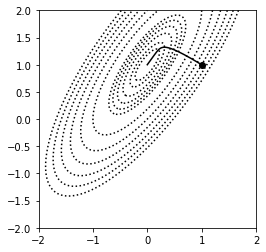

In [36]:
import numpy as np
import matplotlib.pyplot as plt


def f(xx):
    x=xx[0]
    y=xx[1]
    return 5*x**2-6*x*y+3*y**2+6*x-6*y


def df(xx):
    x=xx[0]
    y=xx[1]
    return np.array([10*x-6*y+6,-6*x+6*y-6])


algo=GradientDescent(f,df)
initial=np.array([1,1])
algo.solve(initial)
print(algo.x_)
print(algo.opt_)

plt.scatter(initial[0],initial[1],color='k',marker='o')
plt.plot(
    algo.path_[:,0],algo.path_[:,1],color='k',
    linewidth=1.5)
xs=np.linspace(-2,2,300)
ys=np.linspace(-2,2,300)
xmesh,ymesh=np.meshgrid(xs,ys)
xx=np.r_[xmesh.reshape(1,-1),ymesh.reshape(1,-1)]
levels=[-3,-2.9,-2.8,-2.6,-2.4,-2.2,-2,-1,0,1,2,3,4]
plt.contour(
    xs,ys,f(xx).reshape(xmesh.shape),
    levels=levels,colors='k',linestyles='dotted')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in subtract


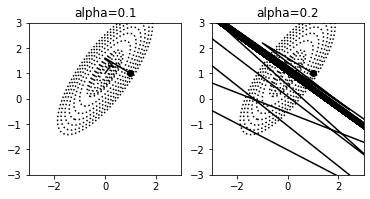

In [39]:
import numpy as np
import matplotlib.pyplot as plt


def f(xx):
    x=xx[0]
    y=xx[1]
    return 5*x**2-6*x*y+3*y**2+6*x-6*y


def df(xx):
    x=xx[0]
    y=xx[1]
    return np.array([10*x-6*y+6,-6*x+6*y-6])

xmin,xmax,ymin,ymax=-3,3,-3,3

algos=[]
initial=np.array([1,1])
alphas=[0.1,0.2]
for alpha in alphas:
    algo=GradientDescent(f,df,alpha)
    algo.solve(np.array(initial))
    algos.append(algo)

xs=np.linspace(-3,3,300)
ys=np.linspace(-3,3,300)
xmesh,ymesh=np.meshgrid(xs,ys)
xx=np.r_[xmesh.reshape(1,-1),ymesh.reshape(1,-1)]
levels=[-3,-2.9,-2.8,-2.6,-2.4,-2.2,-2,-1,0,1,2,3,4]

fig,ax=plt.subplots(1,2)

for i in range(2):
    ax[i].set_xlim((xmin,xmax))
    ax[i].set_ylim((ymin,ymax))
    ax[i].set_title('alpha={}'.format(alphas[i]))
    ax[i].scatter(initial[0],initial[1],color='k',marker='o')
    ax[i].plot(
        algos[i].path_[:,0],algos[i].path_[:,1],color='k',linewidth=1.5)
    ax[i].contour(
        xs,ys,f(xx).reshape(xmesh.shape),levels=levels,colors='k',
        linestyles='dotted')
    ax[i].set_aspect('equal', adjustable='box')

plt.show()

### ニュートン法
与えられた滑らかな関数$f(x)$について、次の方程式の解を求めたいとする
$$
f(x)=0
$$
ニュートン法では初期値$x_0$から逐次$x_1$、$x_2$・・・を解に近づけていく  
$y=f(x)$の$x=x_k$における接線と$x$軸との交点を$x_{k+1}$とし、ある十分小さい値$\epsilon$について$|x_{k+1}-x_k|\leq \epsilon$となったら終了する  
$y=f(x)$の$x=x_k$における接線の傾きは$f'(x_k)$なので、ここでの接線の方程式は次で表される  
$$
y=f'(x_k)(x-x_k)+f(x_k)
$$
これと$x$軸の交点が$x=x_{k+1}$となる  
$x=x_{k+1}$、$y=0$とおくと次の式が得られる  
$$
x_{k+1}=x_k-\frac{f(x_k)}{f'(x_k)}
$$

次の方程式の解をニュートン法で求める
$$
x^3-5x+1=0
$$

In [130]:
def newton1dim(f,df,x0,eps=1e-10,max_iter=1000):
    x=x0
    iter=0
    while True:
        x_new=x-f(x)/df(x)
        if abs(x-x_new)<eps:
            break
        x=x_new
        iter+=1
        if iter==max_iter:
            break

    return x_new


def f(x):
    return x**3-5*x+1


def df(x):
    return 3*x**2-5


print(newton1dim(f,df,5))
print(newton1dim(f,df,1))
print(newton1dim(f,df,-5))

2.1284190638445777
0.20163967572340463
-2.330058739567982


ニュートン法は多次元の場合にも拡張できる  
例として、次のような連立方程式を考える  
$$
\left\{
\begin{eqnarray}
f_1(x,y)&=&x^3-2y=0\\
f_2(x,y)&=&x^2+y^2-1=0\\
\end{eqnarray}
\right.
$$
$f$を$\mathbb{R}^2$から$\mathbb{R}^2$への写像として、次のように定義する
$$
f(x)=
\left (
\begin{array}{c}
f_1 (x)\\
f_2 (x)
\end{array}
\right )
$$
ここで、
$$
x=
\left (
\begin{array}{c}
x\\
y
\end{array}
\right )
$$
としている  
このときの$f$のヤコビアン行列$J_f (x)$を次で定義する
$$
J_f (x)=
\left (
\begin{array}{c}
\frac{\partial f_1}{\partial x}(x) & \frac{\partial f_1}{\partial y}(x)\\
\frac{\partial f_2}{\partial x}(x) & \frac{\partial f_2}{\partial y}(x)
\end{array}
\right )
$$
このときのニュートン法は次の更新式で与えられる
$$
x_{k+1}=x_k-J_f (x_k)^{-1}f(x_k)
$$

In [31]:
import numpy as np
from numpy import linalg


class Newton:
    def __init__(self,f,df,eps=1e-10,max_iter=1000):
        self.f=f
        self.df=df
        self.eps=eps
        self.max_iter=max_iter


    def solve(self,x0):
        x=x0
        iter=0
        self.path_=x0.reshape(1,-1)
        while True:
            x_new=x-np.dot(linalg.inv(self.df(x)),self.f(x))
            self.path_=np.r_[self.path_,x_new.reshape(1,-1)]
            if ((x-x_new)**2).sum()<self.eps*self.eps:
                break
            x=x_new
            iter+=1
            if iter==self.max_iter:
                break

        return x_new

[0.92071038 0.39024659]
[-0.92071038 -0.39024659]
[0.92071038 0.39024659]


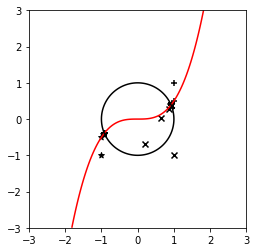

In [33]:
import numpy as np
import matplotlib.pyplot as plt


def f1(x,y):
    return x**3-2*y


def f2(x,y):
    return x**2+y**2-1


def f(xx):
    x=xx[0]
    y=xx[1]
    return np.array([f1(x,y),f2(x,y)])


def df(xx):
    x=xx[0]
    y=xx[0]
    return np.array([[3*x**2,-2],[2*x,2*y]])


xmin,xmax,ymin,ymax=-3,3,-3,3
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
x=np.linspace(xmin,xmax,200)
y=np.linspace(ymin,ymax,200)
xmesh,ymesh=np.meshgrid(x,y)
z1=f1(xmesh,ymesh)
z2=f2(xmesh,ymesh)
plt.contour(xmesh,ymesh,z1,colors='r',levels=[0])
plt.contour(xmesh,ymesh,z2,colors='k',levels=[0])
solver=Newton(f,df)

initials=[
    np.array([1,1]),
    np.array([-1,-1]),
    np.array([1,-1])]
markers=['+','*','x']

for x0,m in zip(initials,markers):
    sol=solver.solve(x0)
    plt.scatter(
        solver.path_[:,0],
        solver.path_[:,1],color='k',marker=m)
    plt.gca().set_aspect('equal', adjustable='box')
    print(sol)

plt.show()

一般に$\mathbb{R}^d$から$\mathbb{R}^d$への写像$f$についても、ニュートン法は適用できる  
一般に$x=(x_1,x_2,...,xd)^T\in \mathbb{R}^d$に対して、
$$
f(x)=
\left(
\begin{array}{c}
f_1(x)\\
f_2(x)\\
\vdots\\
f_d(x)
\end{array}
\right)
\in \mathbb{R}
$$
という写像が与えられたとき、そのヤコビアンは次で定義される
$$
J_f=
\left(
\begin{array}{c}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_d}\\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \cdots & \frac{\partial f_2}{\partial x_d}\\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial f_d}{\partial x_1} & \frac{\partial f_d}{\partial x_2} & \cdots & \frac{\partial f_d}{\partial x_d}\\
\end{array}
\right)
$$
このときも$||x_{k+1}-x_k||\leq \epsilon$となるまで、次の更新式を繰り返すと$f(x)=0$の解を計算できる
$$
x_{k+1}=x_k-J_f(x_k)^{-1}f(x_k)
$$

#### 数値微分に関する補足
微分の定義
$$
f'(x)=\lim_{h \rightarrow 0}\frac{f(x+h)-f(x)}{h}
$$
において、$f(x+h)-f(x)$の部分が「値の近い数同士の引き算」になるため、あまり高い計算制度がでない  
ブラックボックスで　中身がわかっていない関数でないかぎり、関数とその導関数は別に用意して与えたほうが良い

### ラグランジュ未定乗数法
制約式も線形とは限らない最適化問題を考える  
まずは等号制約のみの次の最適化問題を考える
$$
\begin{eqnarray}
{\rm Minimize}&\ &f(x,y)=5x^2+6xy+5y^2-26x-26y\\
{\rm Subject\ to}&\ &g(x,y)=x^2+y^2-4=0
\end{eqnarray}
$$
これを解くためには、次のような3変数関数を考える
$$
\begin{eqnarray}
L(x,y,\lambda)&=&f(x,y)+\lambda g(x,y)\\
&=&5x^2+6xy+5y^2-26x-26y+\lambda (x^2+y^2-4)
\end{eqnarray}
$$
そしてこれを最大化すればよい  
つまり、次の式を解くことで最適解が求められる
$$
\nabla L(x,y,\lambda)=0
$$

このような手法をラグランジュ未定乗数法と呼ぶ  
このときに関数$L$をラグランジュ関数と呼び、$\lambda$をラグランジュ乗数と呼ぶ
$$
\frac{\partial L}{\partial x}=10x+6y-26+2\lambda x\\
\frac{\partial L}{\partial y}=10y+6x-26+2\lambda y
$$
$\nabla L=0$から次の連立方程式を得る
$$
\left\{
\begin{eqnarray}
10x+6y-26+2\lambda x=0&\ &\cdots①\\
10y+6x-26+2\lambda y=0&\ &\cdots②\\
x^2+y^2-4=0&\ &\cdots③
\end{eqnarray}
\right.
$$
①＋②と①ー②を計算し、③に代入することで次の解を得る
$$
x=\sqrt 2,\ y=\sqrt2,\ \lambda =\frac{13\sqrt 2 -16}{2}

$$

次に不等号制約がある最適化問題を考える  
次の二つの最適化問題を考える
$$
\begin{eqnarray}
{\rm Minimize}&\ &f_1(x,y)=5x^2+6xy+5y^2-26x-26y\\
{\rm Subject\ to}&\ &g_1(x,y)=x^2+y^2-4\leq 0
\end{eqnarray}
\hspace{15pt} 式04-11a
$$

$$
\begin{eqnarray}
{\rm Minimize}&\ &f(x,y)=5x^2+6xy+5y^2-16x-16y\\
{\rm Subject\ to}&\ &g(x,y)=x^2+y^2-4\leq 0
\end{eqnarray}
\hspace{15pt} 式04-11b
$$
制約条件と目的関数の等高線を図示すると、それぞれ次のようになる

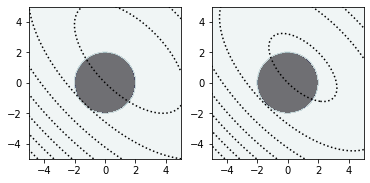

In [102]:
import numpy as np
import matplotlib.pyplot as plt


def f1(x,y):
    return 5*x**2+6*x*y+5*y**2-26*x-26*y


def g1(x,y):
    return x**2+y**2-4


def f2(x,y):
    return 5*x**2+6*x*y+5*y**2-16*x-16*y


def g2(x,y):
    return x**2+y**2-4


xmin,xmax,ymin,ymax=-5,5,-5,5
x=np.linspace(xmin,xmax,300)
y=np.linspace(ymin,ymax,300)
xmesh,ymesh=np.meshgrid(x,y)
fig,ax=plt.subplots(1,2)

for i,(f,g) in enumerate(zip([f1,f2],[g1,g2])):
    ax[i].set_xlim(xmin,xmax)
    ax[i].set_ylim(ymin,ymax)
    ax[i].contour(x,y,f(xmesh,ymesh),colors='k',linestyles='dotted')
    ax[i].contourf(x,y,g(xmesh,ymesh)>=0,cmap=plt.cm.bone,alpha=0.6)
    ax[i].set_aspect('equal', adjustable='box') # グラフの縦横の比をそろえるコマンド   

plt.show()

式04-11aの最適解は、
$$
\nabla f_1=-\lambda \nabla g_1
$$
を満たす点になる  
一方で式04-11bの最適解は、制約条件を無視して$f_2$を最小化したときの最適解と同じなので
$$
\nabla f_2=0
$$
を満たす  
$f_1(x,y)$の等高線と$g_1(x,y)=0$が接するときに、その接点で$\nabla f_1$と$\nabla g_1$はちょうど逆の方向を向いているため
$$
\nabla f_1=-\lambda \nabla g_1\hspace{15pt} (\lambda > 0)
$$
一方で$f_2(x,y)$の等高線と$g_2(x,y)=0$が接するときのその接点では、$\nabla f_2$と$\nabla g_2$は同じ方向を向いている  
つまり一般の2変数最適化問題
$$
\begin{eqnarray}
{\rm Minimize}&\ &f(x,y)\\
{\rm Subject\ to}&\ &g(x,y)\leq 0
\end{eqnarray}
$$
を解くためには、
$$
\nabla f(x,y)=-\lambda \nabla g(x,y)\hspace{15pt}(\lambda>0)
$$
となるような$x,y,\lambda$を見つけることができればその$x,y$が最適解になり、そうでなければ最適解は領域$g(x,y)\leq0$の内部にあるので、制約式を無視した最適化として
$$
\nabla f=0
$$
を解けば良い  
ここでも次のような関数を考える
$$
L(x,y,\lambda)=f(x,y)+\lambda g(x,y)
$$
すると、最適化問題を解くための条件は次のようになる
$$
\begin{eqnarray}
\nabla L(x,y,\lambda)&=&0\\
\lambda g(x,y)&=&0\\
\lambda &\geq& 0\\
g(x,y)&\leq& 0
\end{eqnarray}
$$
この条件が今までの考察と一致するか確認する  
まず$\lambda g(x,y)=0$により、$\lambda$と$g(x,y)$のどちらか一方が0ということになるので、場合分けして考える  
もし$\lambda=0$だとすると、$L(x,y,\lambda)=f(x,y)$となるので、$g(x,y)\leq0$の範囲で$\nabla f(x,y)=0$となる点を求めることになる  
一方、もし$g(x,y)$ならば、点$(x,y)$は制約を表す領域の境界上にあることになり、$\nabla L(x,y,\lambda)=0$はつまり$\nabla f(x,y)=-\lambda \nabla g(x,y)$ということであり、これを$\lambda>0$の範囲で求めることになる  
両方の場合において、前述の考察に一致することが確認できた  
このような解法もラグランジュ未定乗数法と呼ばれ、$L$はラグランジュ関数、$\lambda$はラグランジュ乗数と呼ばれる  
また、ここで出てくる制約条件
$$
\lambda g(x,y)=0,\ \lambda\geq 0,\ g(x,y)\leq 0
$$
は、考案者の3人の名前をとってKarush-Kuhn-Tucker（カルシュ・クーン・タッカー）条件（KKT条件）と呼ばれている

ラグランジュ未定乗数法は一般の多変数関数の場合にも考えることができる  
また、制約条件は一つでなくてもよく、等式制約と不等号制約が混在する場合にも考えることができる  
今までの問題の一般化として、n変数の滑らかな関数$f$、$g_1,...,g_l$、$h_1,...,h_m$が与えられたときに次の関数を考える  
$$
\begin{eqnarray}
{\rm Minimize}&\ &f(x)\\
{\rm Subject\ to}&\ &g_1(x)=0\\
&\ & g_2(x)=0\\
&\ & ︙\\
&\ & g_l(x)=0\\
&\ & h_1(x)\leq 0\\
&\ & h_2(x)\leq 0\\
&\ & ︙\\
&\ & h_m(x)\leq 0
\end{eqnarray}
\hspace{15pt}式04-12
$$
このときのラグランジュ関数を次で定義する
$$
L(x,\lambda,\mu)=f(x)+\lambda_1g_1(x)+\lambda_2g_2(x)+...+\lambda_lg_l(x)+\mu_1h_1(x)+\mu_2h_2(x)+...+\mu_mh_m(x)
$$
このときの式04-12の最適解を$x^*$とすると、次を満たすような$\lambda$、$\mu$が存在する  
$$
\begin{align}
&\nabla L(x,\lambda,\mu)=0,\\
&\mu_1h_1(x^*)=0,\ \mu_2h_2(x^*)=0,\ \mu_lh_l(x^*)=0,\\
&\mu_1\geq 0,\ \mu_2\geq 0,\ \mu_l \geq 0,\\
&h_1(x^*)\leq 0,\ h_2(x^*)\leq 0,\ h_m(x^*)\leq 0
\end{align}
\hspace{15pt}式04-13
$$
これは必要条件であることに注意する  
つまりもし最適解$x^*$が存在するならば必ず式04-13を満たすということに過ぎず、式04-13を満たす$x^*$を見つけたとしてもそれが最適解であるかどうかはわからない  
最適解であることを確認するには、さらにヘッセ行列などを計算することが必要になる

## 04-09 統計

### 統計基本量
共分散：  
次のようにn個の組がデータとして与えられたとする
$$
(x_1,y_1),(x_2,y_2),\cdots,(x_n,y_n)
$$
ここで$x_i$と$y_i$の系列をそれぞれベクトルとみて
$$
x=(x_1,x_2,\cdots,x_n)^T,\ y=(y_1,y_2,\cdots,y_n)^T
$$
とおく.このとき$x$と$y$の共分散はつぎの式で定義される
$$
\sigma_{xy}=\frac{1}{n}\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})\\
(\bar{x}:\ xの平均,\ \bar{y}:\ yの平均)
$$
共分散は二つの数の相関を表している.もし「$x_i$が大きければ$y_i$も大きく、$x_i$が小さければ$y_i$も小さい」という傾向があれば、$x_i-\bar{x}$と$y_i-\bar{y}$は同時に正、もしくは同時に負になることが多くなり、つまりそれらの積は正になることが多くなる.  
$x$や$y$の散らばりが大きいと共分散も大きくなる傾向があるので、純粋に相関だけを見たいときは、共分散を$x$と$y$の標準偏差で割ったものを考えることが多い.この値、つまり
$$
\frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}
$$
は相関係数と呼ばれ、１から−１までの値をとる.

In [121]:
import numpy as np
import pandas as pd

df=pd.read_csv('data.csv',encoding='cp932',skiprows=5,header=0,index_col=0)
# print(df)
x=df['Unnamed: 1'].values   #東京の2020年4月の最高気温
y=df['Unnamed: 4'].values   #札幌の2020年4月の最高気温

mx=x.sum()/len(x)
my=y.sum()/len(y)
sx=np.sqrt(((x-mx)**2).sum()/len(x))
sy=np.sqrt(((y-my)**2).sum()/len(y))
sxy=((x-mx)*(y-my)).sum()/len(x)
print('東京の最高気温の標準偏差:{:.4f}'.format(sx))
print('札幌の最高気温の標準偏差:{:.4f}'.format(sy))
print('共分散:{:.4f}'.format(sxy))
print('相関係数:{:.4f}'.format(sxy/(sx*sy)))

東京の最高気温の標準偏差:3.2455
札幌の最高気温の標準偏差:3.2857
共分散:3.6082
相関係数:0.3384


各系列のデータと共分散を同時に考えたいことがある.そのときに考えるのが共分散行列.$x$と$y$の共分散行列は次で与えられる.
$$
\sum=
\left(
\begin{array}{c}
\sigma_{xx}&\sigma_{xy}\\
\sigma_{yx}&\sigma_{yy}
\end{array}
\right)
=
\left(
\begin{array}{c}
\sigma_x^2&\sigma_{xy}\\
\sigma_{yx}&\sigma_y^2
\end{array}
\right)
$$
共分散行列を一般にm個のデータの系列について考えた場合は次で定義される.
$$
\sum=
\left(
\begin{array}{c}
\sigma_{x_1x_1}&\sigma_{x_1x_2}&…&\sigma_{x_1x_m}\\
\sigma_{x_2x_1}&\sigma_{x_2x_2}&…&\sigma_{x_2x_m}\\
\vdots&\vdots&\ddots&\vdots\\
\sigma_{x_mx_1}&\sigma_{x_mx_2}&…&\sigma_{x_mx_m}\\
\end{array}
\right)
$$
共分散の性質により$\sigma_{x_ix_j}=\sigma_{x_jx_i}$なので、この行列は対称行列になる.

### 正規分布と確率密度関数
正規分布は次で定義される.
$$
f(x)=\dfrac{1}{\sqrt{2\pi}\sigma}\exp\left\{-\dfrac{(x-\mu)^2}{2\sigma^2}\right\}\hspace{30pt}式04-14
$$
この分布に従う確率変数を$X$とし、この確率を考える.また上記の関数で表される確率分布は$N(\mu,\sigma)$で表すこともあり、$X$がその分布に従うことを
$$
X\sim N(\mu,\sigma)
$$
と書くこともある.$X$が正規分布に従う場合、ある$a$に対して$P(X=a)$というものを考えるとこれは常に０になる.一方$a<b$となる$a$、$b$に対して$P(a\leq X\leq b)$というものを考えると
$$
P(a\leq X \leq b)=\int_a^b f(x)dx
$$
となる.このように、ある範囲の値をとる確率がその積分で計算できるような関数を確率密度関数と呼ぶ.  
ここで、
$$
\int_{-\infty}^{\infty}f(x)dx=1\hspace{30pt}式04-15
$$
が成り立つ.

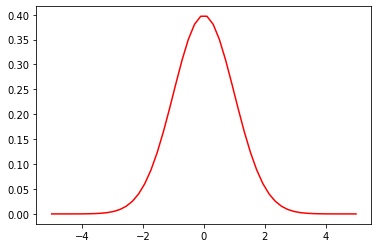

In [122]:
# 正規分布のグラフを描画する
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x=np.linspace(-5,5)
y=norm.pdf(x)   # 平均0,標準偏差1の正規分布（関数）を返す
plt.plot(x,y,color='r')
plt.show()

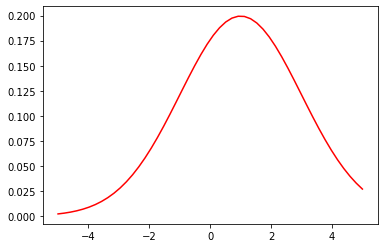

In [127]:
x=np.linspace(-5,5)
y=norm.pdf(x,loc=1,scale=2) #平均1,標準偏差2の正規分布
plt.plot(x,y,color='r')
plt.show()

正規分布に従う確率変数Xがある範囲$[a,b]$に入る確率$P(a\leq X\leq b)$を計算する方法の説明の前に、まず累積分布関数を定義する.累積分布関数とは、正規分布に限定せず一般の確率密度関数$f$に対して定義できる概念であり、
$$
F(x)=\int_{-\infty}^x f(t)dt
$$
で定義される.つまり確率分布がfに従う確率変数を$X$とすると
$$
F(x)=P(X\leq x)
$$
となる.  
SciPyには正規分布の累積分布関数を計算する関数scipy.stats.norm.cdfがあるので、正規分布に従う確率変数Xについて$P(a\leq X \leq b)$を計算するにはこれを利用している.
$$
\begin{eqnarray}
P(a\leq X \leq b)&=&\int_a^bf(x)dx\\
&=&\int_{-\infty}^bf(x)dx-\int_{-\infty}^a f(x)dx\\
&=&F(b)-F(a)
\end{eqnarray}
$$
であることを利用すると計算できる.

In [128]:
from scipy.stats import norm

norm.cdf(1)-norm.cdf(-1)

0.6826894921370859

正規分布はよく使われる分布で、実世界には近似的に正規分布に従うことがらも多い.そのことを実感するために「$n$個のコインを同時に投げて表になったものの数」という確率変数を考える.これは$n$を大きくしていくと正規分布に近づく.

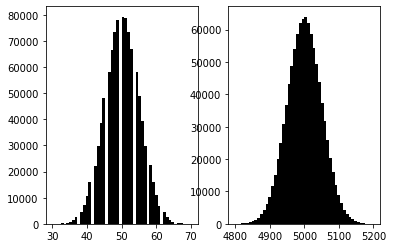

In [129]:
import numpy as np
import matplotlib.pyplot as plt


def cointoss(n,m):  # n個のコインを投げることをm回繰り返し、結果をリストで返す
    l=[]
    for _ in range(m):
        r=np.random.randint(2,size=n)
        l.append(r.sum())

    return l


np.random.seed(0)
fig,axes=plt.subplots(1,2)

l=cointoss(100,1000000)
axes[0].hist(l,range=(30,70),bins=50,color='k')
l=cointoss(10000,1000000)
axes[1].hist(l,range=(4800,5200),bins=50,color='k')
plt.show()

確率変数$X$について、平均（期待値）は$E(X)$で表され、$X$が離散型で全事象が$A=\{a_1,\cdots,a_n\}$のときは次で与えられる.
$$
E(X)=\sum_{i=1}^n a_iP(X=a_i)
$$
また、連続型のときは次のように定義される.
$$
E(X)=\int_{-\infty}^\infty xP(X=x)dx
$$
確率変数の値を取り出すということを何度も繰り返したときの値の平均は、取り出す回数を増やしていくと、この$E(X)$に近づく.  
平均については次のような線形性が成り立つ.ただし、ここで$X$と$Y$は確率変数とし、$k\in \mathbb{R}$とする.
$$
\begin{eqnarray}
E(X+Y)&=&E(X)+E(Y)\\
E(kX)&=&kE(X)
\end{eqnarray}
\hspace{15pt}式04-16
$$
次に分散を定義する.分散$V(X)$は次で定義される.
$$
V(X)=E((X-E(X))^2)
$$
これは離散型と連続型で共通の定義である.$V(X)$は、確率変数の値を取り出すことを続けたときの値のばらつきを表している.分散については、次の重要な性質がある.
$$
V(X)=E(X^2)-(E(X))^2
$$
これは式04-16を使って次のように証明できる.
$$
\begin{eqnarray}
E((X-E(X))^2)&=&E\left(X^2-2E(X)\cdot X+(E(X))^2\right)\\
&=&E(X^2)-E(2E(X)\cdot X)+(E(X))^2\\
&=&E(X^2)-2E(X)\cdot E(X)+(E(X))^2\\
&=&E(X^2)-2(E(X))^2+(E(X))^2\\
&=&E(X^2)-(E(X))^2
\end{eqnarray}
$$



具体的な例について平均と分散を求めてみる.一様離散分布を考えると、平均は次のようになる.
$$
\begin{eqnarray}
E(X)&=&\sum_{i=1}^n (i\cdot \frac{1}{n})\\
&=&\frac{1}{n}\sum_{i=1}^n i\\
&=&\frac{1}{n}\cdot \frac{1}{2}n(n+1)\\
&=&\frac{1}{2}(n+1)
\end{eqnarray}
$$
次に分散を計算する.
$$
\begin{eqnarray}
V(X)&=&E(X^2)-(E(X))^2\\
&=&\sum_{i=1}^n \left( t^2\cdot \frac{1}{n}\right)-\left(\frac{1}{2}(n+1)\right)^2\\
&=&\frac{1}{n}\cdot \frac{1}{6}n(n+1)(2n+1)-\left( \frac{1}{2}(n+1)\right)^2\\
&=&\frac{1}{12}(n+1)(n-1)
\end{eqnarray}
$$
となる.特にサイコロの場合を考えると$n=6$にあたるので、平均は$\frac{7}{2}=3.5$、分散は$\frac{35}{12}\approx2.92$となる.  

次に、正規分布について平均と分散を計算する.以下で$f$は式04-14で定義されたものとする.式04-15の性質に気をつけて平均を計算する.
$$
\begin{eqnarray}
E(X)&=&\int_{-\infty}^\infty xf(x)dx\\
&=&\int_{-\infty}^\infty \{(x-\mu)+\mu\}f(x)dx\\
&=&\int_{-\infty}^\infty (x-\mu)f(x)dx+\mu \int_{-\infty}^\infty f(x)dx\\
&=&\int_{-\infty}^\infty (x-\mu)\frac{1}{\sqrt{2\pi}\sigma}\exp\left\{-\frac{(x-\mu)^2}{2\sigma^2}\right\}dx+\mu
\end{eqnarray}
\hspace{30pt}式04-17
$$
ここで
$$
\begin{eqnarray}
f'(x)&=&\frac{1}{\sqrt{2\pi}\sigma}\exp\left\{-\frac{(x-\mu)^2}{2\sigma^2}\right\}\times\left\{-\frac{(x-\mu)^2}{2\sigma^2}\right\}'\\
&=&-\frac{x-\mu}{\sigma^2}\cdot \frac{1}{\sqrt{2\pi}\sigma}\exp\left\{-\frac{(x-\mu)^2}{2\sigma^2}\right\}\\
&=&-\frac{x-\mu}{\sigma^2}f(x)
\end{eqnarray}
$$
であるので、この式を式04-17に代入すると
$$
\begin{eqnarray}
E(X)&=&\int_{-\infty}^\infty-\sigma^2f'(x)dx+\mu\\
&=&\left[-\sigma^2f(x)\right]_{-\infty}^\infty+\mu\\
&=&\mu
\end{eqnarray}
$$
となる.ここで
$$
\lim_{x\rightarrow - \infty}f(x)=\lim_{x\rightarrow\infty}f(x)=0
$$
を使った.  
次に分散を計算する.
$$
\begin{eqnarray}
V(X)&=&E((X-\mu)^2)\\
&=&\int_{-\infty}^\infty(x-\mu)^2f(x)dx
\end{eqnarray}
\hspace{30pt}式04-18
$$
となるが、ここで
$$
\begin{eqnarray}
((x-\mu)f(x))'&=&f(x)+(x-\mu)f'(x)\\
&=&f(x)-\frac{(x-\mu)^2}{\sigma^2}f(x)
\end{eqnarray}
$$
であるので、
$$
(x-\mu)^2f(x)=\sigma^2f(x)-\sigma^2((x-\mu)f(x))'
$$
となる.これを式04-18に代入すると以下のようになる.
$$
\begin{eqnarray}
V(X)&=&\int_{-\infty}^\infty\left\{\sigma^2f(x)-\sigma^2((x-\mu)f(x))'\right\}dx\\
&=&\sigma^2\int_{-\infty}^\infty f(x)dx-\sigma^2\int_{-\infty}^\infty ((x-\mu)f(x))'dx\\
&=&\sigma^2-\left[(x-\mu)f(x)\right]_{-\infty}^\infty\\
&=&\sigma^2
\end{eqnarray}
$$
ただしここで
$$
\lim_{x\rightarrow \infty}(x-\mu)f(x)=\lim_{x\rightarrow -\infty}(x-\mu)f(x)=0
$$
であることを使った.以上から式04-14で表される正規分布の平均は$\mu$であり、分散は$\sigma^2$であることがわかった.